# Doing things with text 2

## Making word clouds from a preprocessed text

### Import packages

In [1]:
from bs4 import BeautifulSoup
import unicodedata
import re
from nltk.tokenize import word_tokenize  # needs to be installed first via nltk.download()
from nltk.corpus import stopwords  # needs to be installed first via nltk.download()
from wordcloud import WordCloud
import matplotlib.pyplot as plt 

### Import and read text file

In [2]:
file = '/Users/huijn001/Desktop/game_of_thrones.txt'

In [3]:
with open(file, encoding='utf8') as f:
    text = f.read()

In [4]:
print(text[:100])


 
 
  
 A Game of Thrones, A Clash of Kings, A Storm of Swords, A Feast for Crows , and  A Dance wi


## Preprocessing

In [5]:
def remove_html(text):
    """ Use the library BeautifulSoup (bs4) to remove html tags """
    soup = BeautifulSoup(text, "lxml")
    clean_text = soup.get_text()
    return clean_text

def remove_short_words(words, n=3):
    new_words = []
    for word in words:
        if len(word) >= n:
            new_words.append(word)
    return new_words

def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

def remove_numbers(words):
    """Remove all integer occurrences in list of tokenized words
    """
    new_words = []
    for word in words:
        if not word.isdigit():
            new_words.append(word)
    return new_words

def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

def remove_stop_words_languages(words, languages=['dutch', 'french']):
    """ Remove stop words from specified languages """
    all_stop_words = []
    for language in languages:
        all_stop_words.extend(stopwords.words(language))
    stop_words = list(set(all_stop_words))
    return remove_stop_words(words, stop_words)

def remove_stop_words(words, stop_words):
    """ Given a list of words and stop words, remove stop words """
    new_words = []
    for word in words:
        if word not in stop_words:
            new_words.append(word)
    return new_words

In [6]:
def all_operations(words):
    words = remove_short_words(words)
    words = remove_non_ascii(words)
    words = remove_punctuation(words)
    words = remove_numbers(words)
    words = to_lowercase(words)
    words = remove_stop_words_languages(words)
    return words

#### Call functions

In [7]:
clean_text = remove_html(text)

In [8]:
words = word_tokenize(clean_text)

In [9]:
input_as_list = all_operations(words)

In [10]:
print(input_as_list[:100])

['game', 'thrones', 'clash', 'kings', 'storm', 'swords', 'feast', 'for', 'crows', 'and', 'dance', 'with', 'dragons', 'are', 'works', 'fiction', 'names', 'places', 'and', 'incidents', 'either', 'are', 'products', 'the', 'author', 'imagination', 'are', 'used', 'fictitiously', 'bantam', 'dell', 'ebook', 'edition', 'game', 'thrones', 'copyright', 'george', 'martin', 'clash', 'kings', 'copyright', 'george', 'martin', 'storm', 'swords', 'copyright', 'george', 'martin', 'feast', 'for', 'crows', 'copyright', 'george', 'martin', 'dance', 'with', 'dragons', 'copyright', 'george', 'martin', 'all', 'rights', 'reserved', 'published', 'the', 'united', 'states', 'bantam', 'books', 'imprint', 'the', 'random', 'house', 'publishing', 'group', 'division', 'random', 'house', 'inc', 'new', 'york', 'bantam', 'books', 'and', 'colophon', 'are', 'registered', 'trademarks', 'random', 'house', 'inc', 'the', 'novels', 'contained', 'this', 'omnibus', 'were', 'each', 'published', 'separately']


In [23]:
long_input_as_list = []
for word in input_as_list:
    if len(word) > 4:
        long_input_as_list.append(word)

#### Turn input_as_list into string¶

In [24]:
input_as_string = " ".join(long_input_as_list)

In [25]:
print(input_as_string[:100])

thrones clash kings storm swords feast crows dance dragons works fiction names places incidents eith


## Analysis

### Word clouds

In [26]:
sw = ['you', 'all', 'him', 'int', 'ext', 'and', 'the', 'what', 'that', 'with', 'said', 'this', 'when', 'them', 'were', 'from', 'will', 'there', 'they', 'then', 'their', 'your', 'would', 'only', 'even', 'know', 'could', 'have', 'where', 'come', 'been', 'made', 'well']
text_cloud = WordCloud(background_color='black', stopwords=sw, colormap='Set2',random_state=5).generate(input_as_string)

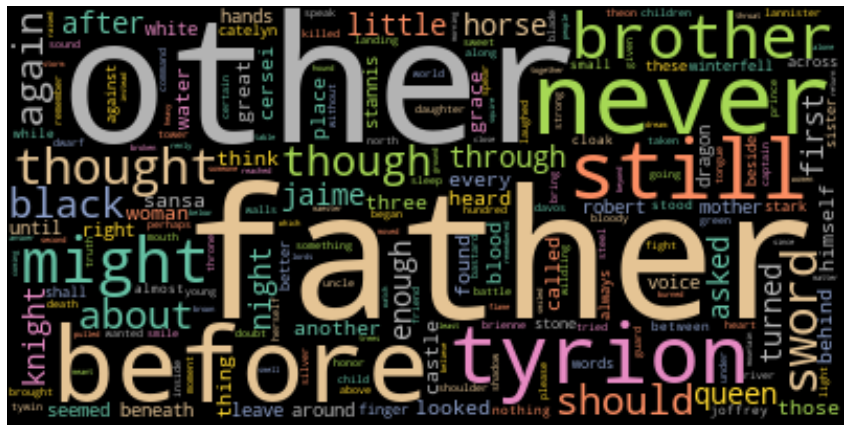

In [27]:
my_dpi = 300
fig = plt.figure(figsize = (15,8))
plt.imshow(text_cloud, interpolation='bilinear')
plt.axis('off')
#plt.savefig('/Users/huijn001/Desktop/starwars_2005.png', dpi=my_dpi, bbox_inches='tight')
plt.show()